# NEURAL NETWORKS AND DEEP LEARNING

---
A.A. 2021/22 (6 CFU) - Dr. Alberto Testolin, Dr. Umberto Michieli
---


# Homework 1 - Supervised Deep Learning

## General overview
In this homework you will learn how to implement and test simple neural network models for solving supervised problems. It is divided in two tasks.

* **Regression task**: 
the regression model will consist in a simple function approximation problem, similar to the one discussed during the Lab practices. 

* **Classification task**: 
the classification model will consist in a simple image recognition problem, where the goal is to correctly classify images of Zalando's article images (Fashion MNIST). 

In both cases, but especially for the classification problem, you should explore the use of advanced optimizers and regularization methods (e.g., initialization scheme, momentum, ADAM, early stopping, L2, L1 / sparsity, dropout…) to improve convergence of stochastic gradient descent and promote generalization. Learning hyperparameters should be tuned using appropriate search procedures, and final accuracy should be evaluated using a cross-validation setup. For the image classification task, you can also implement more advanced convolutional architectures and explore feature visualization techniques to better understand how the deep network is encoding information at different processing layers.



## Technical notes
The homework should be implemented in Python using the PyTorch framework. The student can explore additional libraries and tools to implement the models; however, please make sure you understand the code you are writing because during the exam you might receive specific questions related to your implementation. The entire source code required to run the homework must be uploaded as a compressed archive in a Moodle section dedicated to the homework.If your code will be entirely included in a single Python notebook, just upload the notebook file.




## Final report
Along with the source code, you must separately upload a PDF file containing a brief report of your homework. The report should include a brief Introduction on which you explain the homework goals and the main implementation strategies you choose, a brief Method section where you describe your model architectures and hyperparameters, and a Result section where you present the simulation results. Total length should not exceed 6 pages, though you can include additional tables and figures in a final Appendix (optional). The report must be self-contained, so please make sure that all relevant results are explicitly included in the report / notebook.




## Grade
The maximum grade for this homework will be **8 points**. Points will be assigned based on the correct implementation of the following items:
*	2 pt: implement basic regression and classification tasks
*	2 pt: explore advanced optimizers and regularization methods (both tasks)
*	1 pt: optimize hyperparameters using grid/random search and cross-validation (both tasks)
*	2 pt: implement CNN for classification task
*	1 pt: visualize weight histograms, activation profiles and receptive fields



## Deadline
The complete homework (notebook or source code + report) must be submitted through Moodle at least 10 days before the chosen exam date.


# Regression task

## Guidelines

* The goal is to train a neural network to approximate an unknown function:
$$ 
f:\mathbb{R}→\mathbb{R} \\
x↦y=f(x) \\
\text{network}(x) \approx f(x)
$$
* As training point, you only have noisy measures from the target function.
$$
\hat{y} = f(x) + noise
$$
* Consider to create a validation set from you training data, or use a k-fold cross-validation strategy. You may find useful these functions from the `scikit-learn` library:
    - [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) 

## Dataset

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The following cell of code will download the dataset and make it available in the local folder `regression_dataset`. There are two files:

* `regression_dataset/train_data.csv`
* `regression_dataset/test_data.csv`

Use them to train and test your model. Each row contains two values, respactively the input and the target (label).

In [78]:
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
!wget -P regression_dataset https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv 

--2021-11-24 14:28:29--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/train_data.csv
正在解析主机 gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
正在连接 gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：3776 (3.7K) [text/plain]
正在保存至: “regression_dataset/train_data.csv.20”

train_data.csv.20   100%[===================>]   3.69K  --.-KB/s  用时 0s      

2021-11-24 14:28:29 (18.2 MB/s) - 已保存 “regression_dataset/train_data.csv.20” [3776/3776])

--2021-11-24 14:28:30--  https://gitlab.dei.unipd.it/michieli/nnld-2021-22-lab-resources/-/raw/main/homework1/test_data.csv
正在解析主机 gitlab.dei.unipd.it (gitlab.dei.unipd.it)... 147.162.2.85
正在连接 gitlab.dei.unipd.it (gitlab.dei.unipd.it)|147.162.2.85|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：3788 (3.7K) [text/plain]
正在保存至: “regression_dataset/test_data.csv.20”

test_data.csv.20    100%[===================>]   3.70K  --.-KB/s  用时 0s      

2021-11-24 14:28:30

How to load the data:

In [79]:
train_df = pd.read_csv('regression_dataset/train_data.csv')
train_df = train_df.sort_values('input')
x_train = train_df.iloc[:,0].values
y_train = train_df.iloc[:,1].values
print("x_train: ",x_train)
print("y_train: ",y_train)
#print("x_train shape",x_train.shape)
#print("y_train shape",y_train.shape)
x_train = np.reshape(x_train,(1, x_train.size))
print("x_train shape",x_train.shape)
y_train = np.reshape(y_train,(1, y_train.size))


x_train:  [-4.91586284 -4.78787019 -4.75410728 -4.71965718 -4.71648826 -4.4797566
 -4.45202139 -4.43685421 -4.23058819 -4.22085193 -4.20904998 -4.19002703
 -4.08351763 -4.0648022  -3.94695751 -3.88896465 -3.85537293 -3.84450729
 -3.80181167 -3.76878898 -3.75473317 -3.66407518 -3.54400746 -3.50905703
 -3.44016059 -3.19453581 -3.12286175 -3.08224242 -3.05002328 -3.03113639
 -0.93957081 -0.93309933 -0.90292075 -0.8025681  -0.76904388 -0.75425133
 -0.65387273 -0.60971738 -0.48598514 -0.46424157 -0.33884202 -0.33630048
 -0.3298803  -0.30924234 -0.2649473  -0.25311031 -0.22212626 -0.1704728
 -0.1086442  -0.06637551  0.14180836  0.31874401  0.3635325   0.8119635
  0.90285791  1.29945941  1.45830856  1.53942648  1.59770317  1.72599515
  3.10549054  3.13026067  3.24532891  3.24545168  3.4972157   3.65874366
  3.67975852  3.72643234  3.76692173  3.83795581  4.0233863   4.0380728
  4.06681054  4.10003748  4.14387614  4.14389831  4.26876842  4.36860029
  4.39123483  4.45452347  4.49999879  4.54724

How to get a specific sample:

In [80]:
sample_index = 0
input = train_df.iloc[sample_index]['input']
label = train_df.iloc[sample_index]['label']

print(f"SAMPLE AT INDEX {sample_index}")
print(f"INPUT: {input}")
print(f"LABEL: {label}")

SAMPLE AT INDEX 0
INPUT: -4.915862840819678
LABEL: -3.742969516141261


All training points:

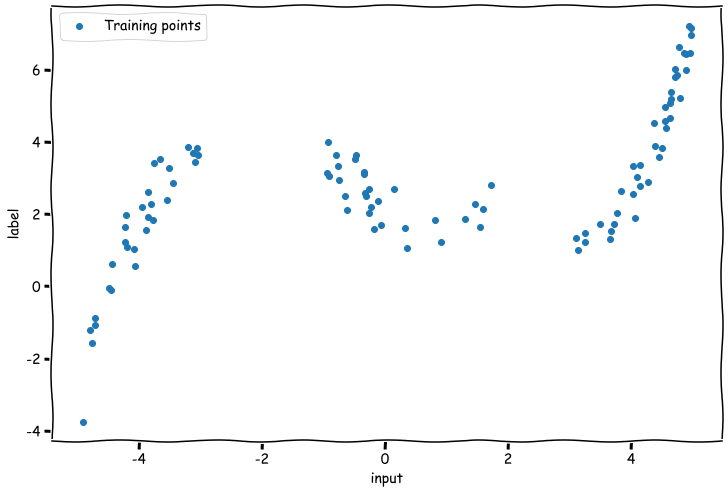

In [81]:
fig = plt.figure(figsize=(12,8))
plt.scatter(train_df.input, train_df.label, label='Training points')
plt.xlabel('input')
plt.ylabel('label')
plt.legend()
plt.show()

STEP 1:
Implement basic regression 

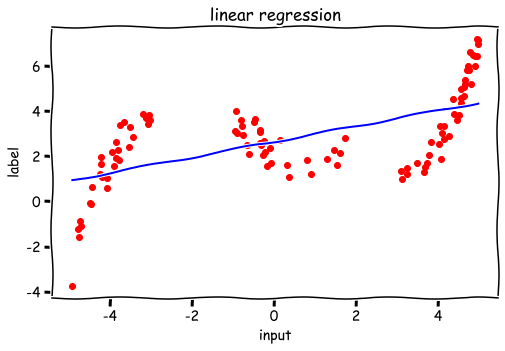

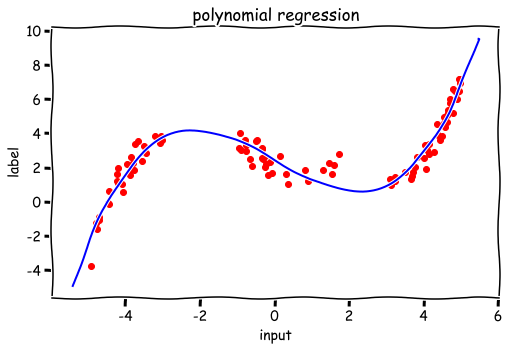

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def apply_linear_regression(x,y):
    x = x.reshape(len(x[0]),1)
    y = y.flatten()
    lr = LinearRegression().fit(x,y)
    plt.figure(figsize=(8,5))
    plt.title('linear regression')
    plt.scatter(x,y,color = 'red')
    y_predict = lr.predict(x)
    plt.plot(x,y_predict,'blue')
    plt.xlabel("input")
    plt.ylabel("label")
    plt.show()
    
apply_linear_regression(x_train,y_train)


def apply_polynomial_regression(x,y,degree=3):
    poly_reg = PolynomialFeatures(degree=degree)
    x2 = x.reshape(len(x[0]),1)
    y2 = y.flatten()
    X_poly = poly_reg.fit_transform(x2)
    lin_reg = LinearRegression().fit(X_poly, y2)
    # Visualizing the Polymonial Regression results
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='red')
    x_generated = np.linspace(min(x2) - 0.5, max(x2) + 0.5, 1000) 
    y3 = lin_reg.predict(poly_reg.fit_transform(x_generated))
    plt.plot(x_generated, y3, color='blue')
    plt.title('polynomial regression')
    plt.xlabel('input')
    plt.ylabel('label')
    plt.show()

apply_polynomial_regression(x_train,y_train)


STEP 2:
explore advanced optimizers and regularization methods


STEP 3:optimize hyperparameters using grid/random search and cross-validation

# Classification task

## Guidelines

* The goal is to train a neural network that maps an input image (from fashionMNIST) to one of ten classes (multi-class classification problem with mutually exclusive classes).
* Define a proper loss (e.g. [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss))
* Also here, consider to create a validation set from you training data, or use a k-fold cross-validation strategy.
* Pay attention to the shape, data type and output values range. If needed, modify them accordingly to your implementation (read carefully the documentation of the layers that you use, e.g. [torch.nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)).
* Explore different optimizers, acivation functions, network architectures. Analyze the effect of different regularization methods, such as dropout layers, random transformations (image rotation, scaling, add noise...) or L2 regularization (weight decay).

## Dataset

In [83]:
import torch
from pathlib import Path
import pandas as pd
import numpy as np
import random
import torchvision
import matplotlib.pyplot as plt
import torchvision.datasets as dsts
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold

import torch.nn.functional as F
import torch.nn as NN
torch.__version__



'1.10.0'

In order to use dataloader from pyTorch, we need to build a dataset

In [84]:
# class FashionMNISTDataset(Dataset):
#     def __init__(self, csv_file, transform=None):
#         data = pd.read_csv(csv_file)
#         self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28).astype(float)
#         self.Y = np.array(data.iloc[:, 0]);
#         del data;  #结束data对数据的引用,节省空间
#         self.len=len(self.X)

#     def __len__(self):
#         return self.len
#         #return len(self.X)


#     def __getitem__(self, idx):
#         item = self.X[idx]
#         label = self.Y[idx]
#         return (item, label)

Download the dataset:

In [85]:
train_dataset = torchvision.datasets.FashionMNIST('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.FashionMNIST('classifier_data', train=False, download=True)

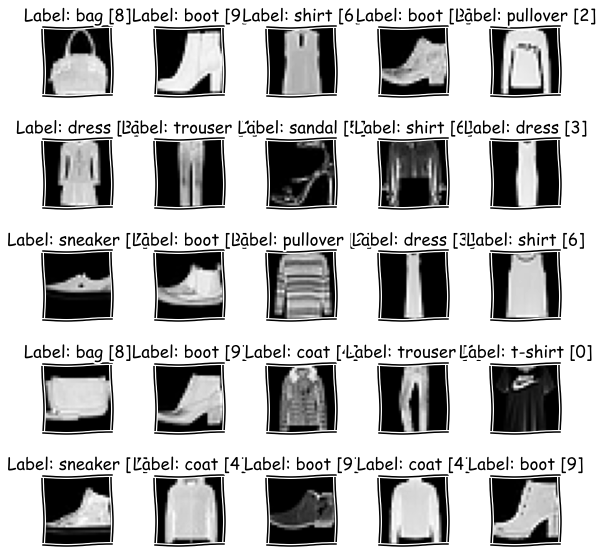

In [86]:
### Plot some sample
label_names=['t-shirt','trouser','pullover','dress','coat','sandal','shirt',
             'sneaker','bag','boot']
fig, axs = plt.subplots(5, 5, figsize=(8,8))
for ax in axs.flatten():
    # random.choice allows to randomly sample from a list-like object (basically anything that can be accessed with an index, like our dataset)
    img, label = random.choice(train_dataset)
    ax.imshow(np.array(img), cmap='gist_gray')
    ax.set_title(f'Label: {label_names[label]} [{label}]')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

How to get an image and the corresponding label:

SAMPLE AT INDEX 1
LABEL: 0


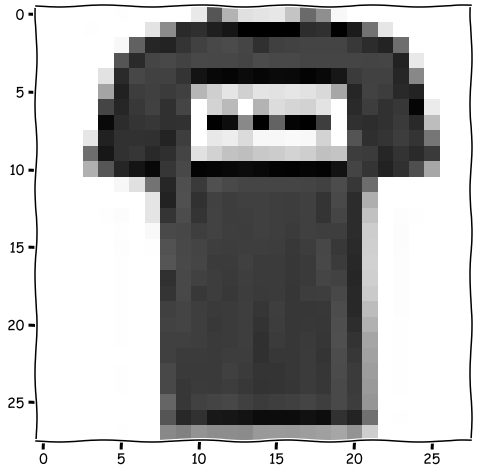

In [87]:
sample_index = 1
image = train_dataset[sample_index][0]
label = train_dataset[sample_index][1]

fig = plt.figure(figsize=(8,8))
plt.imshow(image, cmap='Greys')
print(f"SAMPLE AT INDEX {sample_index}")
print(f"LABEL: {label}")

The output of the dataset is a PIL Image, a python object specifically developed to manage and process images. PyTorch supports this format, and there are useful transforms available natively in the framework: https://pytorch.org/docs/stable/torchvision/transforms.html

If you want, you can easily convert a PIL image to a numpy array and entirely ignore the PIL object:

In [88]:

image_numpy = np.array(image)

print(f'Numpy array shape: {image_numpy.shape}')
print(f'Numpy array type: {image_numpy.dtype}')

Numpy array shape: (28, 28)
Numpy array type: uint8


To transform a PIL Image directly to a PyTorch tensor, instead:

In [89]:

to_tensor = torchvision.transforms.ToTensor()
image_tensor = to_tensor(image)

print(f'PyTorch tensor shape: {image_tensor.shape}')
print(f'PyTorch tensor type: {image_tensor.dtype}')

PyTorch tensor shape: torch.Size([1, 28, 28])
PyTorch tensor type: torch.float32


目标：
implement classification tasks and explore advanced optimizers and regularization methods
*	1 pt: optimize hyperparameters using grid/random search and cross-validation 
*	2 pt: implement CNN for classification task
*	1 pt: visualize weight histograms, activation profiles and receptive fields

## Define the dataset transform

In [90]:

train_transform = transforms.Compose([
    transforms.ToTensor(),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Set the train transform
train_dataset.transform = train_transform

# Set the test transform
test_dataset.transform = test_transform

## Define the dataloader

train: 60000 test: 10000
train: 50000 validation 10000 test: 10000


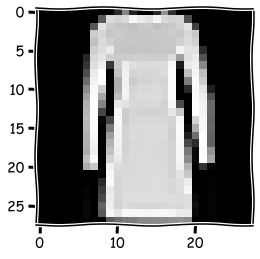

In [91]:
print('train:', len(train_dataset), 'test:', len(test_dataset))
# 首先先查看train和test数据集的数量，看看是否满足预订的分配目标

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

print('train:', len(train_dataset), 'validation',len(val_dataset),'test:', len(test_dataset))

#define a batch size as 256
BATCH_SIZE = 256

#load the data to use them
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = BATCH_SIZE,shuffle = True)
val_loader = torch.utils.data.DataLoader(dataset = val_dataset,batch_size = BATCH_SIZE,shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = BATCH_SIZE,shuffle = False) 
# needn't shuffle for test data



#have a look on the data
a = iter(train_loader)
data = next(a)

img = data[0][0].reshape(28,28)
data[0][0].shape,img.shape
(torch.Size([1, 28, 28]), torch.Size([28, 28]))
plt.imshow(img,cmap = plt.cm.gray)
plt.show()


## Build Neural Networks

In [92]:
class CNN(NN.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = NN.Sequential(   
            NN.Conv2d(1, 16, kernel_size=5, padding=2),
            NN.BatchNorm2d(16), 
            NN.ReLU()) #16, 28, 28
        self.pool1=NN.MaxPool2d(2) #16, 14, 14
        self.layer2 = NN.Sequential(
            NN.Conv2d(16, 32, kernel_size=3),
            NN.BatchNorm2d(32),
            NN.ReLU())#32, 12, 12
        self.layer3 = NN.Sequential(
            NN.Conv2d(32, 64, kernel_size=3),
            NN.BatchNorm2d(64),
            NN.ReLU()) #64, 10, 10
        self.pool2=NN.MaxPool2d(2)  #64, 5, 5
        self.fc = NN.Linear(5*5*64, 10)
    def forward(self, x):
        out = self.layer1(x)
        #print(out.shape)
        out=self.pool1(out)
        #print(out.shape)
        out = self.layer2(out)
        #print(out.shape)
        out=self.layer3(out)
        #print(out.shape)
        out=self.pool2(out)
        #print(out.shape)
        out = out.view(out.size(0), -1)
        #print(out.shape)
        out = self.fc(out)
        return out




In [93]:

cnn = CNN()
#可以通过以下方式验证，没报错说明没问题，
cnn(torch.rand(1,1,28,28))

tensor([[-1.3230,  0.5430,  0.3094, -0.3495, -0.9250, -1.2964,  1.5663,  0.9553,
          0.9523,  0.2235]], grad_fn=<AddmmBackward0>)

In [94]:
print(cnn)

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1600, out_features=10, bias=True)
)


In [95]:
DEVICE=torch.device("cpu")
if torch.cuda.is_available():
        DEVICE=torch.device("cuda")
print(DEVICE)

cpu


In [96]:
cnn=cnn.to(DEVICE)

## Loss Function


In [97]:
criterion = NN.CrossEntropyLoss().to(DEVICE)

## Optimizer

In [98]:
LEARNING_RATE=0.01
optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)

## Training

In [99]:
TOTAL_EPOCHS=50
losses = []
for epoch in range(TOTAL_EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.float().to(DEVICE)
        labels = labels.to(DEVICE)
        #清零
        optimizer.zero_grad()
        outputs = cnn(images)
        #计算损失函数
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.cpu().data.item());
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f'%(epoch+1, TOTAL_EPOCHS, i+1, len(train_dataset)//BATCH_SIZE, loss.data.item()))


Epoch : 1/50, Iter : 100/195,  Loss: 0.4743
Epoch : 2/50, Iter : 100/195,  Loss: 0.4293
Epoch : 3/50, Iter : 100/195,  Loss: 0.2382
Epoch : 4/50, Iter : 100/195,  Loss: 0.2153
Epoch : 5/50, Iter : 100/195,  Loss: 0.2126
Epoch : 6/50, Iter : 100/195,  Loss: 0.2099
Epoch : 7/50, Iter : 100/195,  Loss: 0.1096
Epoch : 8/50, Iter : 100/195,  Loss: 0.1980
Epoch : 9/50, Iter : 100/195,  Loss: 0.1647
Epoch : 10/50, Iter : 100/195,  Loss: 0.1813
Epoch : 11/50, Iter : 100/195,  Loss: 0.1333
Epoch : 12/50, Iter : 100/195,  Loss: 0.2306
Epoch : 13/50, Iter : 100/195,  Loss: 0.1341
Epoch : 14/50, Iter : 100/195,  Loss: 0.1392
Epoch : 15/50, Iter : 100/195,  Loss: 0.1293
Epoch : 16/50, Iter : 100/195,  Loss: 0.1068
Epoch : 17/50, Iter : 100/195,  Loss: 0.0786
Epoch : 18/50, Iter : 100/195,  Loss: 0.1402
Epoch : 19/50, Iter : 100/195,  Loss: 0.0848
Epoch : 20/50, Iter : 100/195,  Loss: 0.1246
Epoch : 21/50, Iter : 100/195,  Loss: 0.0766
Epoch : 22/50, Iter : 100/195,  Loss: 0.0629
Epoch : 23/50, Iter

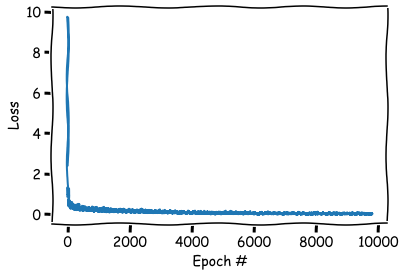

In [100]:
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses);
plt.show();

In [101]:
torch.save(cnn.state_dict(), "fm-cnn3.pth")
# 加载用
#cnn.load_state_dict(torch.load("fm-cnn3.pth"))

### Validation accuracy


In [102]:
cnn.eval()
correct = 0
total = 0
for images, labels in val_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('accuracy: %.4f %%' % (100 * correct / total))

accuracy: 90.7700 %


### Test accuracy

In [103]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = images.float().to(DEVICE)
    outputs = cnn(images).cpu()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
print('accuracy: %.4f %%' % (100 * correct / total))

accuracy: 90.7100 %
